<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL4.png' width="80%" height="80%"></img>

<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL2.png' width="80%" height="80%"></img>

<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL3.png' width="80%" height="80%"></img>

<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL1.png' width="80%" height="80%"></img>

# SQL queries Dataframes, not RDDs

A data file on world banks will downloaded from GitHub after removing any previous data that may exist

In [1]:
# In jupyter notebooks you can prefice commands with a ! to run shell commands
# here we remove any files with the name of the file we are going to download
# then download the file

!rm world_bank.json.gz -f
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz

--2017-11-16 07:50:53--  https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446287 (436K) [application/octet-stream]
Saving to: ‘world_bank.json.gz’

100%[======================================>] 446,287     --.-K/s   in 0.03s   

2017-11-16 07:50:54 (15.1 MB/s) - ‘world_bank.json.gz’ saved [446287/446287]



# Many other types are supported including text and Parquet

Here we are creating a Dataframe, similar to an RDD, but with a schema and abstraction that allows
for SQL to be used.

In [2]:
#You can load json, text and other files using sqlContext
#unlinke an RDD, this will attempt to create a schema around the data
#self describing data works really well for this

example1_df = spark.read.json("./world_bank.json.gz")

In [3]:
# Spark SQL has the ability to infer the schema of JSON data and understand the structure of the data
#once we have created the Dataframe, we can print out the schema to see the shape of the data

print example1_df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

# Let's take a look at the first two rows of data

The example below enumerates our "take" command that pulls 2 items from the Dataframe
<br>a simpiler option to see the data could also be:<br>

##### copy and run the following code
    for row in example1_df.take(2):
        print row
        print "*" * 20

In [4]:
for row in example1_df.take(2):
        print row
        print "*" * 20

Row(_id=Row($oid=u'52b213b38594d8a2be17c780'), approvalfy=u'1999', board_approval_month=u'November', boardapprovaldate=u'2013-11-12T00:00:00Z', borrower=u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA', closingdate=u'2018-07-07T00:00:00Z', country_namecode=u'Federal Democratic Republic of Ethiopia!$!ET', countrycode=u'ET', countryname=u'Federal Democratic Republic of Ethiopia', countryshortname=u'Ethiopia', docty=u'Project Information Document,Indigenous Peoples Plan,Project Information Document', envassesmentcategorycode=u'C', grantamt=0, ibrdcommamt=0, id=u'P129828', idacommamt=130000000, impagency=u'MINISTRY OF EDUCATION', lendinginstr=u'Investment Project Financing', lendinginstrtype=u'IN', lendprojectcost=550000000, majorsector_percent=[Row(Name=u'Education', Percent=46), Row(Name=u'Education', Percent=26), Row(Name=u'Public Administration, Law, and Justice', Percent=16), Row(Name=u'Education', Percent=12)], mjsector_namecode=[Row(code=u'EX', name=u'Education'), Row(code=u'EX', name=u'E

# Now let's register a table which is a pointer to the Dataframe and allows data access via Spark SQL

##### copy and run the following code
    #Simply use the Dataframe Object to create the table:
    example1_df.registerTempTable("world_bank")

In [5]:
    #Simply use the Dataframe Object to create the table:
    example1_df.registerTempTable("world_bank")

### The returned object will be a dataframe
##### copy and run the following code
    temp_df =  spark.sql("select * from world_bank limit 2")

    print type(temp_df)
    print "*" * 20
    print temp_df

In [6]:
    temp_df =  spark.sql("select * from world_bank limit 2")

    print type(temp_df)
    print "*" * 20
    print temp_df


<class 'pyspark.sql.dataframe.DataFrame'>
********************
DataFrame[_id: struct<$oid:string>, approvalfy: string, board_approval_month: string, boardapprovaldate: string, borrower: string, closingdate: string, country_namecode: string, countrycode: string, countryname: string, countryshortname: string, docty: string, envassesmentcategorycode: string, grantamt: bigint, ibrdcommamt: bigint, id: string, idacommamt: bigint, impagency: string, lendinginstr: string, lendinginstrtype: string, lendprojectcost: bigint, majorsector_percent: array<struct<Name:string,Percent:bigint>>, mjsector_namecode: array<struct<code:string,name:string>>, mjtheme: array<string>, mjtheme_namecode: array<struct<code:string,name:string>>, mjthemecode: string, prodline: string, prodlinetext: string, productlinetype: string, project_abstract: struct<cdata:string>, project_name: string, projectdocs: array<struct<DocDate:string,DocType:string,DocTypeDesc:string,DocURL:string,EntityID:string>>, projectfinancialty

#### One nice feature of the notebooks and python is that we can show it in a table via Pandas
spark.sql("select id, borrower from world_bank limit 2").toPandas()

In [7]:
spark.sql("select id, borrower from world_bank limit 2").toPandas()

,id,borrower
0,P129828,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA
1,P144674,GOVERNMENT OF TUNISIA


### Here is a simple group by example:

#### Count the number of projects by each country, only list the top 10

##### Copy and paste the following: 

    query = """
    select countryname,
    count(1) as projects
    from world_bank
    group by countryname
    order by projects desc
    limit 10
    """
    spark.sql(query).toPandas()


In [10]:
    query = """
    select countryname,
    count(1) as projects
    from world_bank
    group by countryname
    order by projects desc
    limit 10
    """
    spark.sql(query).toPandas()

,countryname,projects
0,Republic of Indonesia,19
1,People's Republic of China,19
2,Socialist Republic of Vietnam,17
3,Republic of India,16
4,Republic of Yemen,13
5,Kingdom of Morocco,12
6,People's Republic of Bangladesh,12
7,Nepal,12
8,Africa,11
9,Republic of Mozambique,11


### Simple Example of Adding a Schema (headers) to an RDD and using it as a dataframe

### In the example below a simple RDD is created with Random Data in two columns and an ID column.

#### copy and run the following code

    import random

    #first let's create a simple RDD

    #create a Python list of lists for our example
    data_e2 = []
    for x in range(1,6):
        random_int = int(random.random() * 10)
        data_e2.append([x, random_int, random_int^2])

    #create the RDD with the random list of lists
    rdd_example2 = sc.parallelize(data_e2)
    print rdd_example2.collect()


In [12]:
import random

#first let's create a simple RDD

#create a Python list of lists for our example
data_e2 = []
for x in range(1,6):
    random_int = int(random.random() * 10)
    data_e2.append([x, random_int, random_int^2])

#create the RDD with the random list of lists
rdd_example2 = sc.parallelize(data_e2)
print rdd_example2.collect()

[[1, 7, 5], [2, 4, 6], [3, 3, 1], [4, 1, 3], [5, 6, 4]]


#### Now we can assign some header information

#### copy and run the following code
    from pyspark.sql.types import *

    # The schema is encoded in a string.
    schemaString = "ID VAL1 VAL2"

    fields = [StructField(field_name, StringType(), True) for field_name in schemaString.split()]
    schema = StructType(fields)

    # Apply the schema to the RDD.
    schemaExample = sqlContext.createDataFrame(rdd_example2, schema)

    # Register the DataFrame as a table.
    schemaExample.registerTempTable("example2")

    # Pull the data
    print schemaExample.collect()



In [13]:
    from pyspark.sql.types import *

    # The schema is encoded in a string.
    schemaString = "ID VAL1 VAL2"

    fields = [StructField(field_name, StringType(), True) for field_name in schemaString.split()]
    schema = StructType(fields)

    # Apply the schema to the RDD.
    schemaExample = sqlContext.createDataFrame(rdd_example2, schema)

    # Register the DataFrame as a table.
    schemaExample.registerTempTable("example2")

    # Pull the data
    print schemaExample.collect()


[Row(ID=u'1', VAL1=u'7', VAL2=u'5'), Row(ID=u'2', VAL1=u'4', VAL2=u'6'), Row(ID=u'3', VAL1=u'3', VAL2=u'1'), Row(ID=u'4', VAL1=u'1', VAL2=u'3'), Row(ID=u'5', VAL1=u'6', VAL2=u'4')]


#### Now we can convert rdd_example3 to a Dataframe

##### copy and run this code
    from pyspark.sql import Row

    rdd_example3 = rdd_example2.map(lambda x: Row(id=x[0], val1=x[1], val2=x[2]))
    print rdd_example3.collect()
    df_example3 = rdd_example3.toDF()

In [14]:
    from pyspark.sql import Row

    rdd_example3 = rdd_example2.map(lambda x: Row(id=x[0], val1=x[1], val2=x[2]))
    print rdd_example3.collect()
    df_example3 = rdd_example3.toDF()

[Row(id=1, val1=7, val2=5), Row(id=2, val1=4, val2=6), Row(id=3, val1=3, val2=1), Row(id=4, val1=1, val2=3), Row(id=5, val1=6, val2=4)]


### Register this new data frame as a table 
register as temp table, call it 'df_example3'

    df_example3.registerTempTable('df_example3')

In [15]:
df_example3.registerTempTable('df_example3')

# Another powerful feature is the ability to create Functions and Use them in SQL Here is a simple example

First we create a function in Python, then register it allowing for us to call it via SQL

#### copy and run the following code
    def simple_function(v):
        return int(v * 10)

    #test the function
    print simple_function(3)

In [16]:
    def simple_function(v):
        return int(v * 10)

    #test the function
    print simple_function(3)

30


#### Now we can register the function for use in SQL
spark.udf.register('simple_function',simple_function,pyspark.sql.types.IntegerType())


In [17]:
spark.udf.register('simple_function',simple_function,pyspark.sql.types.IntegerType())

#### VAL1 and VAL2 look like strings, we can cast them as well

    query = """
    select
        ID,
        VAL1,
        VAL2,
        simple_function(cast(VAL1 as int)) as s_VAL1,
        simple_function(cast(VAL2 as int)) as s_VAL2
    from
     example2
    """
    spark.sql(query).toPandas()

In [18]:
    query = """
    select
        ID,
        VAL1,
        VAL2,
        simple_function(cast(VAL1 as int)) as s_VAL1,
        simple_function(cast(VAL2 as int)) as s_VAL2
    from
     example2
    """
    spark.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,7,5,70,50
1,2,4,6,40,60
2,3,3,1,30,10
3,4,1,3,10,30
4,5,6,4,60,40


# Pandas & Seaborn Example
Pandas & Seaborn are a common abstraction for working with data in Python.

We can turn Pandas Dataframes into Spark Dataframes, the advantage of this 
could be scale or allowing us to run SQL statements agains the data.

### copy and run the following code
    import seaborn as sns
    import pandas as pd
    print pd

In [19]:
    import seaborn as sns
    import pandas as pd
    print pd

<module 'pandas' from '/usr/local/src/bluemix_jupyter_bundle.v70/notebook/lib/python2.7/site-packages/pandas/__init__.pyc'>


### First, let's grab some UFO data to play with

    !rm SIGHTINGS.csv -f
    !wget https://www.dropbox.com/s/iqf7w9xon14du2e/SIGHTINGS.csv

In [20]:
    !rm SIGHTINGS.csv -f
    !wget https://www.dropbox.com/s/iqf7w9xon14du2e/SIGHTINGS.csv

--2017-11-16 07:57:56--  https://www.dropbox.com/s/iqf7w9xon14du2e/SIGHTINGS.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/gr1K2IchPOUtMTivjxw8l2G7FEaILWBctou2LeYtGZjVEQXJImdxvwVzVMLBAhjH/file [following]
--2017-11-16 07:57:57--  https://dl.dropboxusercontent.com/content_link/gr1K2IchPOUtMTivjxw8l2G7FEaILWBctou2LeYtGZjVEQXJImdxvwVzVMLBAhjH/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.8.6, 2620:100:601b:6::a27d:806
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.8.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13929530 (13M) [text/csv]
Saving to: ‘SIGHTINGS.csv’

100%[======================================>] 13,929,530  9.67MB/s   in 1.4s   

2017-11-16 07:57:59 (9.67 MB

### Using the CSV file, we can create a Pandas Dataframe:
    pandas_df = spark.read.format("csv").options(header="true").load("./SIGHTINGS.csv")
    pandas_df.head()

In [21]:
    pandas_df = spark.read.format("csv").options(header="true").load("./SIGHTINGS.csv")
    pandas_df.head()

Row(datetime=u'10/10/1949 20:30', city=u'san marcos', state=u'tx', country=u'us', shape=u'cylinder', duration (seconds)=u'2700', duration (hours/min)=u'45 minutes', comments=u'This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit', date_posted=u'4/27/2004', latitude=u'29.8830556', longitude =u'-97.9411111')

### Register a Temp Table & look at the dataset, query on date posted and get count 
#### copy and paste this code

    ufo_data = pandas_df
    ufo_data.registerTempTable('ufo_data')
    
#### In another cell:


    query = """
    select count(*), date_posted 
    FROM
        ufo_data
    GROUP BY 
        date_posted
    limit 20

    """
    spark.sql(query).toPandas()


In [22]:
    ufo_data = pandas_df
    ufo_data.registerTempTable('ufo_data')

In [23]:
    query = """
    select count(*), date_posted 
    FROM
        ufo_data
    GROUP BY 
        date_posted
    limit 20

    """
    spark.sql(query).toPandas()

,count(1),date_posted
0,150,2/21/2014
1,126,3/23/2011
2,65,3/16/2012
3,142,1/29/2002
4,165,9/4/2003
5,523,12/16/2005
6,199,1/24/2014
7,1,1/10/2003
8,59,3/7/2000
9,500,4/16/2005


# Visualizing the Data
- Here are some simple ways to create charts using Pandas and Seaborn
- In order to display in the notebook we need to tell matplotlib to render inline
at this point import the supporting libraries as well


In [24]:
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

Pandas can call a function "plot" to create the charts.
Since most charts are created from aggregates the record
set should be small enough to store in Pandas

We can take our UFO data from before and create a 
Pandas Dataframe from the Spark Dataframe

    ufos_df = spark.sql(query).toPandas()

In [25]:
ufos_df = spark.sql(query).toPandas()

To plot we call the "plot" method and specify the type, x and y axis columns
and optionally the size of the chart.

Many more details can be found here:
http://pandas.pydata.org/pandas-docs/stable/visualization.html
    
    
#### copy and run this code
    ufos_df.plot(kind='bar', x='date_posted', y='count(1)', figsize=(6, 2))

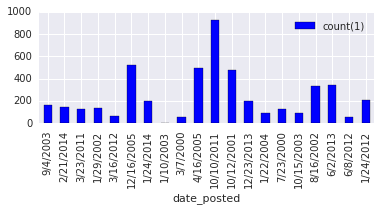

In [26]:
ufos_df.plot(kind='bar', x='date_posted', y='count(1)', figsize=(6, 2))

### Check how many observations have been made across the entire dataset
    spark.sql("select count(*) from ufo_data").toPandas()

In [27]:
spark.sql("select count(*) from ufo_data").toPandas()

,count(1)
0,80332


## Let's get a description and some info about your dataframe 
    ufo_pandas = pandas_df.toPandas()
    ufo_pandas.describe()

#### In another Cell:
    ufo_pandas.info()


In [28]:
    ufo_pandas = pandas_df.toPandas()
    ufo_pandas.describe()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date_posted,latitude,longitude
count,80332,80332,74535,70662,78400,80332,80332,80317,80332,80332,80332
unique,69586,19900,67,5,29,537,8349,79997,317,18445,19489
top,7/4/2010 22:00,seattle,ca,us,light,300,5 minutes,Fireball,12/12/2009,47.6063889,-122.3308333
freq,36,525,9655,65114,16565,8635,4716,11,1510,581,581


In [29]:
    ufo_pandas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null object
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date_posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null object
dtypes: object(11)
memory usage: 7.4+ MB


## Density Plot
Using Seaborn for collecting sightings by year, we can see that the peak of sightings occured around the year 2000.

    The steps we took:
        Using the pandas dataframe we cleanse the datatype and make it integers for visualization.

    ufo_pandas['datetime'] = pd.to_datetime(ufo_pandas['datetime'], errors='coerce')
    ufo_pandas['year'] = ufo_pandas['datetime'].dt.year
    ufo_pandas['year'] = ufo_pandas['year'].fillna(0).astype(int)

    plt.figure(figsize=(8,4))
    sns.distplot(ufo_pandas['year'])
    plt.xlim(1900,2015)
    plt.show()

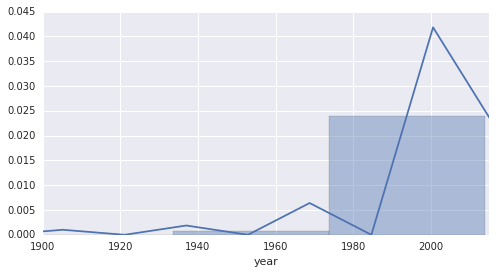

In [30]:
    ufo_pandas['datetime'] = pd.to_datetime(ufo_pandas['datetime'], errors='coerce')
    ufo_pandas['year'] = ufo_pandas['datetime'].dt.year
    ufo_pandas['year'] = ufo_pandas['year'].fillna(0).astype(int)

    plt.figure(figsize=(8,4))
    sns.distplot(ufo_pandas['year'])
    plt.xlim(1900,2015)
    plt.show()

## Sightings by State
    From this bar chart, we see that there are more than 500 UFO sightings reported in California. And there are 6 states that have reported more than 200 UFO sightings.
    
    

    plt.figure(figsize=(16,8))
    sns.countplot(x="state", data=ufo_pandas, palette="Greens_d")
    plt.show()

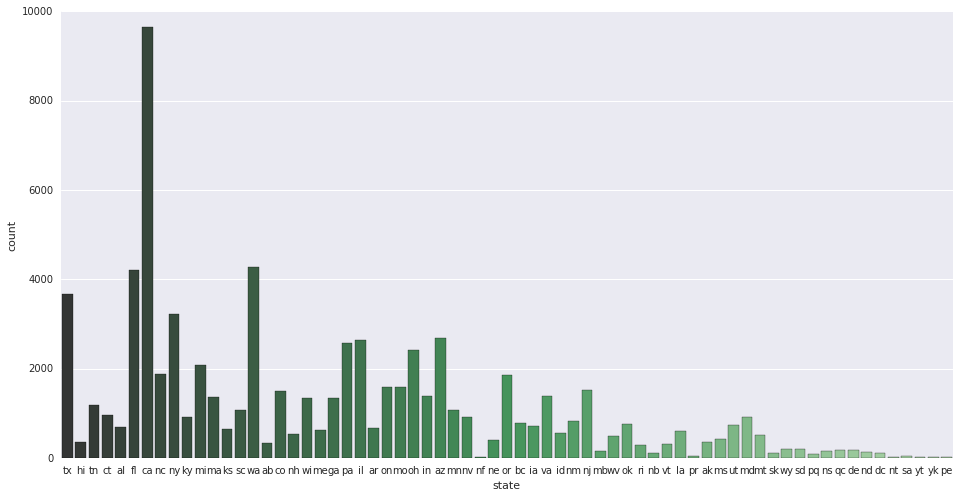

In [31]:


plt.figure(figsize=(16,8))
sns.countplot(x="state", data=ufo_pandas, palette="Greens_d")
plt.show()

